In [2]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == 

# **load dataset**

In [13]:
from datasets import load_dataset
ds = load_dataset("dair-ai/emotion","split")
print(ds["train"][0])

{'text': 'i didnt feel humiliated', 'label': 0}


# **Download Nltk resourses`**

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


# **convert  to pandas dataframe**

In [14]:
import pandas as pd
train_df = ds['train'].to_pandas()
test_df = ds['test'].to_pandas()
val_df = ds['validation'].to_pandas()

df = pd.concat([train_df, test_df, val_df])
print(df.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


# **label names**

In [15]:
label_names = ds["train"].features["label"].names
df["emotion"] = df["label"].apply(lambda x: label_names[x])
print(df[["text", "emotion"]].head())

                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [16]:
df['text'].value_counts()
df['emotion'].value_counts()

,count
emotion,
joy,6761
sadness,5797
anger,2709
fear,2373
love,1641
surprise,719


In [22]:
!pip install contractions

In [24]:
import contractions

def expand_contractions(text):
    return contractions.fix(text)

# **Define text cleaning function**


In [49]:
import nltk
import contractions
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
negation_words = {"not", "no", "never", "none", "n't"}
lemmatizer = WordNetLemmatizer()


def advanced_clean(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()


    filtered_words = [word for word in words if word not in stop_words or word in negation_words]

    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)


df['clean_text'] = df['text'].apply(advanced_clean)
df[['text', 'clean_text']].head()


,text,clean_text
0,i didnt feel humiliated,not feel humiliated
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,feeling grouchy


In [35]:
import nltk
print(nltk.data.path)
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

def tokenize(clean_text):
    return word_tokenize(clean_text)

df['tokenized_text']=df['clean_text'].apply(lambda x: tokenize(x))
df.head()

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,label,emotion,tokenized_text,clean_text
0,i didnt feel humiliated,0,sadness,"[not, feel, humiliated]",not feel humiliated
1,i can go from feeling so hopeless to so damned...,0,sadness,"[go, feeling, hopeless, damned, hopeful, aroun...",go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,anger,"[grabbing, minute, post, feel, greedy, wrong]",grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,love,"[ever, feeling, nostalgic, fireplace, know, st...",ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,anger,"[feeling, grouchy]",feeling grouchy


# **splitting data**

In [36]:
from sklearn.model_selection import train_test_split
x= df['tokenized_text']
y= df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
X_train = [' '.join(x) if isinstance(x, list) else x for x in X_train]
X_test = [' '.join(x) if isinstance(x, list) else x for x in X_test]

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# **appling models**

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Support Vector Machine': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(class_weight='balanced')
}


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import tqdm

models_acc = []
model_name = []

for modelname, model in tqdm.tqdm(models.items()):
    model.fit(X_train_tfidf, y_train)
    model_name.append(modelname)
    y_pred = model.predict(X_test_tfidf)
    models_acc.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ])

model_acc = pd.DataFrame(models_acc, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=model_name)
print(model_acc)

 86%|████████▌ | 6/7 [07:50<01:00, 60.34s/it] /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:17:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
100%|██████████| 7/7 [08:35<00:00, 73.70s/it]

                        Accuracy  Precision   Recall  F1 Score
Logistic Regression      0.88350   0.892172  0.88350  0.885676
Random Forest            0.87175   0.873886  0.87175  0.872089
Support Vector Machine   0.85850   0.860466  0.85850  0.854200
KNN                      0.79075   0.796449  0.79075  0.785630
Naive Bayes              0.68100   0.768459  0.68100  0.615291
Decision Tree            0.85725   0.862868  0.85725  0.858946
XGBoost                  0.87800   0.880595  0.87800  0.878495


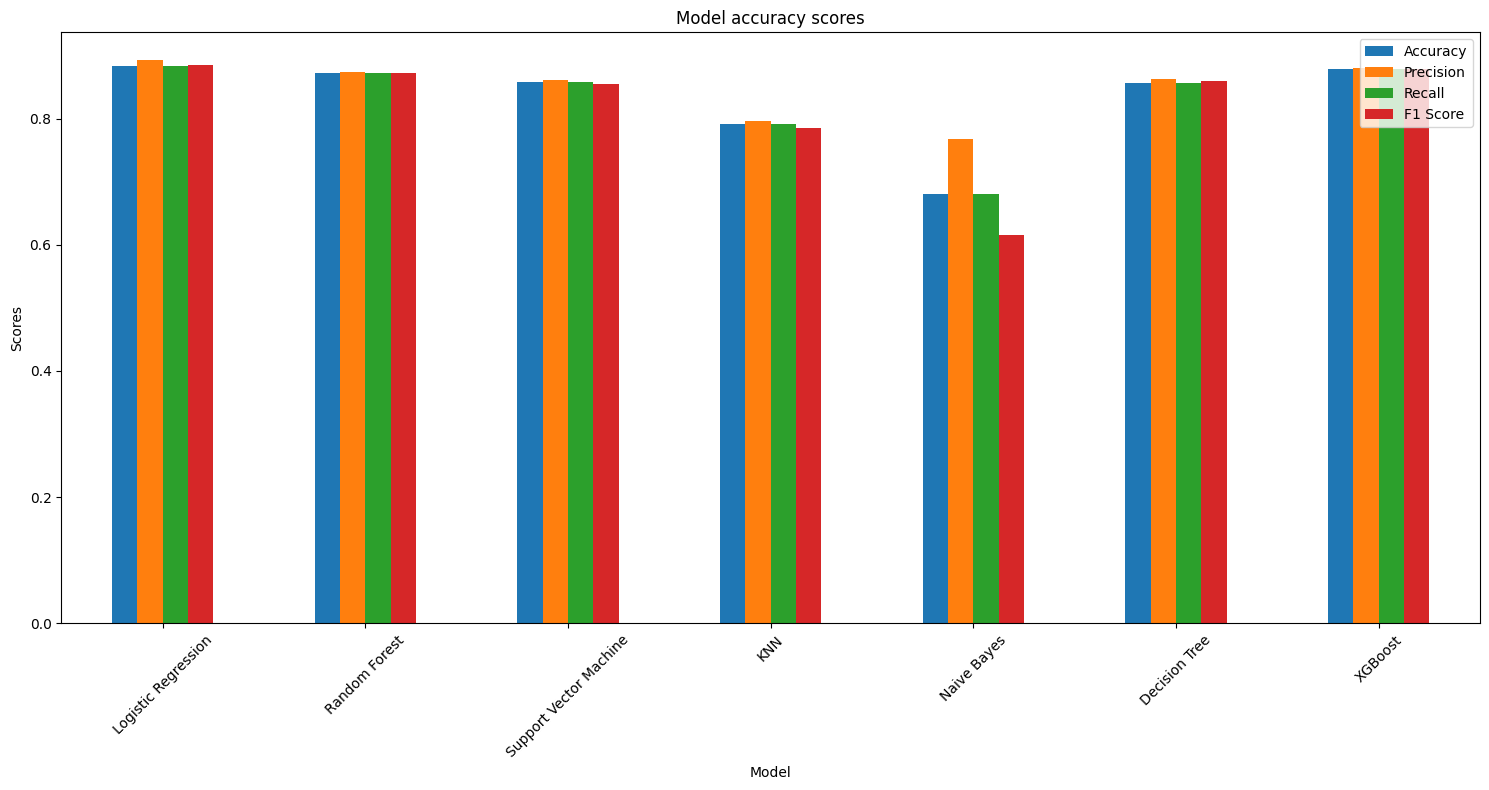

In [43]:
import matplotlib.pyplot as plt

model_acc.plot(kind='bar', figsize=(15,8))

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model accuracy scores')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

# **confusion_matrix and classification_report**

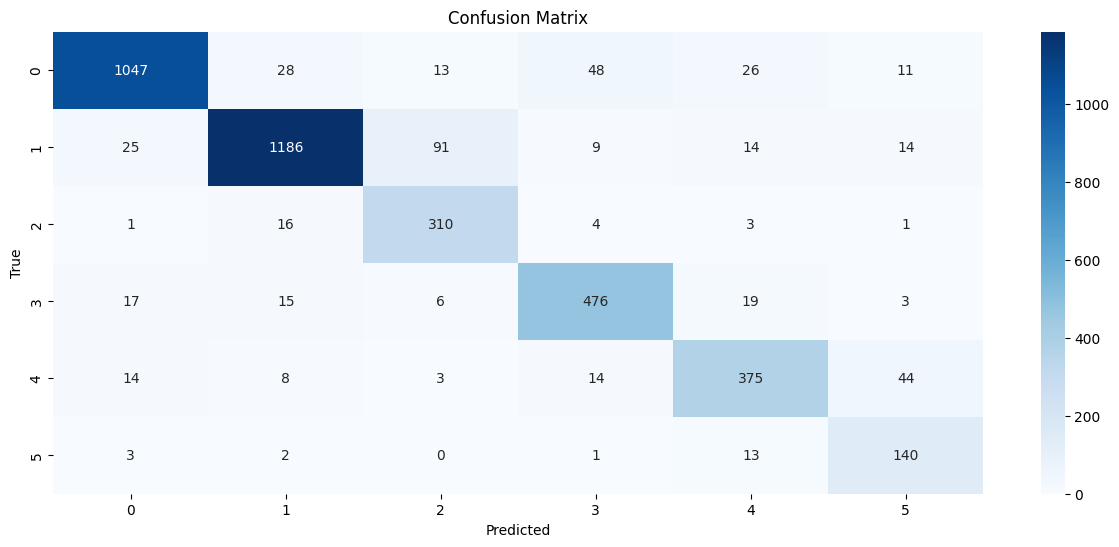

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

best_model = models['Logistic Regression']
y_pred = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

plt.figure(figsize=(15,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [45]:
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1173
           1       0.95      0.89      0.91      1339
           2       0.73      0.93      0.82       335
           3       0.86      0.89      0.88       536
           4       0.83      0.82      0.83       458
           5       0.66      0.88      0.75       159

    accuracy                           0.88      4000
   macro avg       0.83      0.88      0.85      4000
weighted avg       0.89      0.88      0.89      4000



# **Emotion Detection from User Input**

In [48]:
sample_text = "I feel really good about the new opportunity!"
sample_cleaned = advanced_clean(sample_text)
sample_vectorized = tfidf.transform([sample_cleaned])
best_model = models["Logistic Regression"]
pred = best_model.predict(sample_vectorized)
label_names = ds['train'].features['label'].names
print("Predicted Emotion:", label_names[pred[0]])

Predicted Emotion: joy
